# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Circular Aperture Antennas
***

Referring to Section 3.2.3.2, circular apertures are quite common as microwave antennas because they are relatively easy to construct, and closed form expressions exist for all the modes of field distributions existing on such an aperture.  

### Uniform Distribution in an Infinite Ground Plane
For this case, consider a circular aperture in an infinite ground plane that has a uniform field distribution on the aperture, as illustrated in Figure 3.13. The uniform field distribution in the aperture is given by (Equation 3.80)

$$
  \vec{E}_a=\begin{cases}
     E_0\, \hat{y} & \text{for  }\hspace{5pt} \rho' \leq a\\[5pt]
    0 & \text{otherwise}
  \end{cases} \hspace{0.5in} \text{(V/m)},
$$

where $E_0$ is a constant, and $a$ is the radius of the aperture.  The far zone electric and magnetic fields are found from Equations 3.81 - 3.85


### TE11 Distribution in an Infinite Ground Plane
A common application of aperture antennas is a circular aperture on a large ground plane with the aperture fields being those of the dominant TE11 waveguide mode.  The field distribution for this case is (Equation 3.87)

$$
  \vec{E}_a = 
	\begin{cases}
		E_{\rho}\, \hat{\rho} + E_{\phi}\, \hat{\phi}  & \text{for }\hspace{5pt} \rho' \leq a\\[5pt]
        0 & \text{otherwise}
	\end{cases}    \hspace{0.5in} \text{(V/m)},
$$

The far zone electric and magnetic fields are found to be Equations 3.88 - 3.92
***

Begin by getting the library path

In [1]:
import lib_path

Set the operating frequency (Hz) and the aperture radius (m)

In [2]:
frequency = 1e9

radius = 0.5

Set up the theta and phi arrays using the `meshgrid` and `linspace` routines from `scipy`

In [3]:
from numpy import linspace, meshgrid, finfo

from scipy.constants import pi


n = 200

m = int(n/4)

theta, phi = meshgrid(linspace(finfo(float).eps, 0.5 * pi, n), linspace(finfo(float).eps, 2.0 * pi, n))

Calculate the antenna parameters and antenna pattern for the circular uniform ground plane antenna OR the circular TE11 ground plane antenna

In [4]:
from Libs.antenna.aperture import circular_uniform_ground_plane, circular_te11_ground_plane

antenna_type = 'circular_uniform_ground_plane'


if antenna_type == 'circular_uniform_ground_plane':

    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = circular_uniform_ground_plane.beamwidth(radius, frequency)

    directivity = circular_uniform_ground_plane.directivity(radius, frequency)

    sidelobe_level_eplane = circular_uniform_ground_plane.side_lobe_level()

    sidelobe_level_hplane = sidelobe_level_eplane

    _, et, ep, _, _, _ = circular_uniform_ground_plane.far_fields(radius, frequency, 1e9, theta, phi)


else:
    
    half_power_eplane, half_power_hplane, first_null_eplane, first_null_hplane = circular_te11_ground_plane.beamwidth(radius, frequency)

    directivity = circular_te11_ground_plane.directivity(radius, frequency)
    
    sidelobe_level_eplane = circular_te11_ground_plane.side_lobe_level()

    sidelobe_level_hplane = sidelobe_level_eplane

    _, et, ep, _, _, _ = circular_te11_ground_plane.far_fields(radius, frequency, 1e9, theta, phi)

Display the antenna parameters for the circular aperture antenna

In [5]:
print('Sidelobe level E-plane', (sidelobe_level_eplane))

print('Sidelob level H-plane', (sidelobe_level_hplane))

print('Directivity', (directivity))

Sidelobe level E-plane -17.6
Sidelob level H-plane -17.6
Directivity 109.81415890099116


Create the U-V coordinates for displaying the antenna pattern

In [6]:
from numpy import sin, cos

uu = sin(theta) * cos(phi)

vv = sin(theta) * sin(phi)

Calculate the normalized electric field magnitude

In [7]:
from numpy import sqrt, amax

e_mag = sqrt(abs(et * et + ep * ep))

e_mag /= amax(e_mag)

Create the color plot using the `matplotlib` routines

Text(0.5, 1.0, 'Circular Aperture Antenna Pattern')

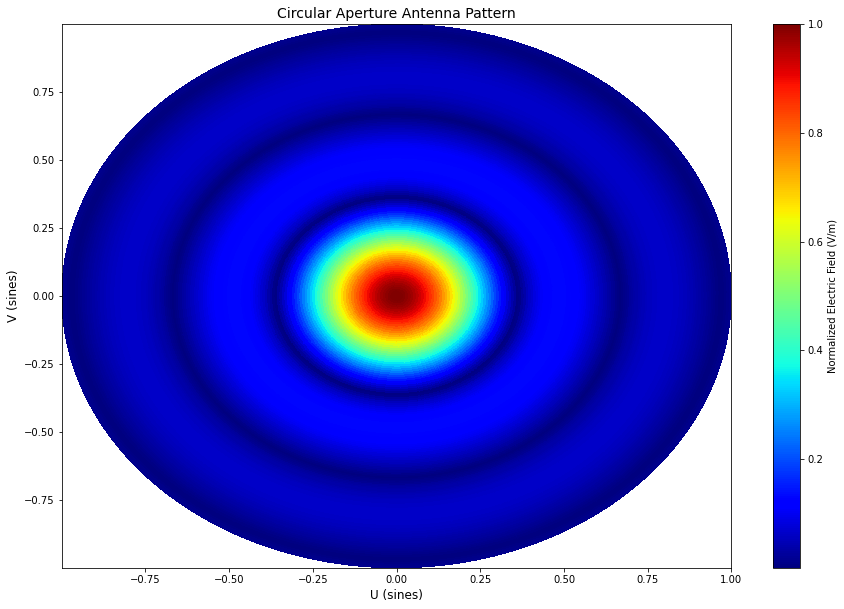

In [8]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Set up the axes

fig, axes1 = plt.subplots()

im = axes1.pcolor(uu, vv, e_mag, cmap="jet", shading = 'auto')

cbar = fig.colorbar(im, ax=axes1, orientation='vertical')

cbar.set_label("Normalized Electric Field (V/m)", size=10)


# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Circular Aperture Antenna Pattern', size=14)

Create the contour plot using the `matplotlib` routines

Text(0.5, 1.0, 'Circular Aperture Antenna Pattern')

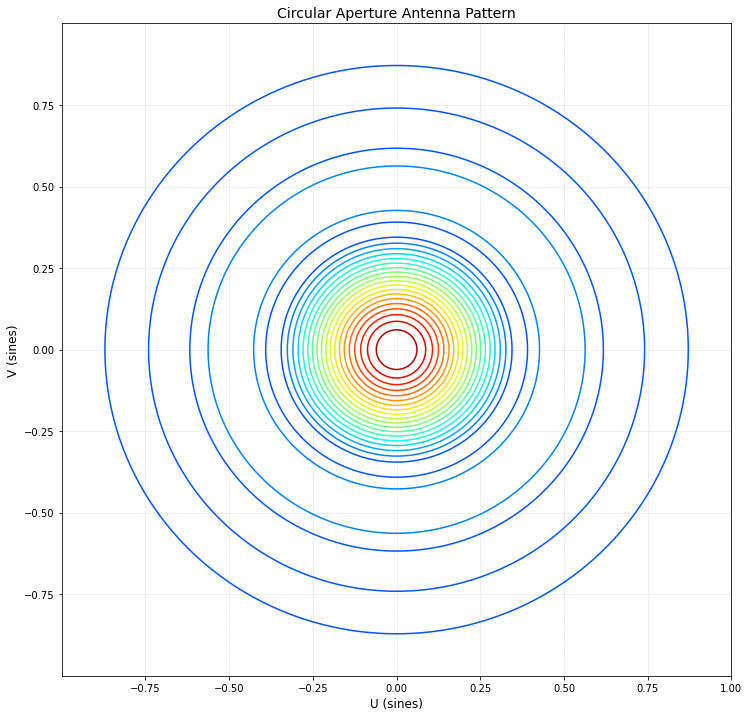

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (12, 12)

plt.contour(uu, vv, e_mag, 20, cmap="jet", vmin=-0.2, vmax=1.0)

plt.grid(linestyle=':', linewidth=0.5)


# Set the x- and y-axis labels

plt.xlabel("U (sines)", size=12)

plt.ylabel("V (sines)", size=12)


# Set the plot title

plt.title('Circular Aperture Antenna Pattern', size=14)

Create the line plot using the `matplotlib` routines

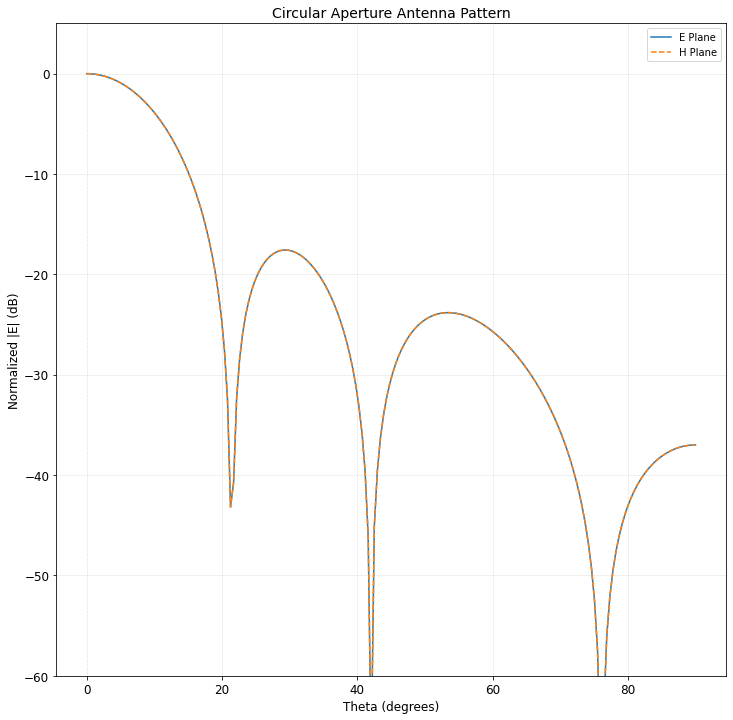

In [10]:
from numpy import degrees, log10


plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[m]), '', label='E Plane')

plt.plot(degrees(theta[0]), 20.0 * log10(e_mag[0]), '--', label='H Plane')


# Set the y axis limit

plt.ylim(-60, 5)



# Set the x and y axis labels

plt.xlabel("Theta (degrees)", size=12)

plt.ylabel("Normalized |E| (dB)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Place the legend

plt.legend(loc='upper right', prop={'size': 10})



# Set the plot title

plt.title('Circular Aperture Antenna Pattern', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)